In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!pip3 install stable-baselines3[extra] protobuf==3.20.*

In [ ]:
!sudo apt install tesseract-ocr -y

In [ ]:
!pip install mss pyautogui pytesseract

In [2]:
from mss import mss
import pyautogui
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from gymnasium import Env
from gymnasium.spaces import Box, Discrete

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

'I\n'

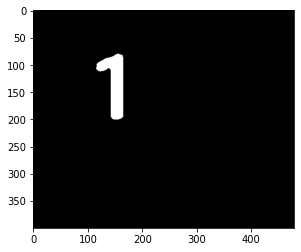

In [65]:
game_location = {'top': 125, 'left': 50, 'width': 60, 'height': 50}
img = mss().grab(game_location)
img = cv2.resize(np.array(img)[:, :, :3], (0, 0), fx=8, fy=8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(thr, cv2.COLOR_BGR2RGB))
pytesseract.image_to_string(thr, config="--psm 10 -c page_separator=''")

In [108]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,100,100), dtype=np.uint8)
        self.action_space = Discrete(4)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 100, 'left': 0, 'width': 600, 'height': 600}
        self.done_location = {'top': 600, 'left': 635, 'width': 75, 'height': 50}
        self.score_location = {'top': 125, 'left': 50, 'width': 60, 'height': 50}

    def step(self, action):
        action_map = {
            0:'up',
            1: 'down',
            2: 'left',
            3: 'right'
        }
        pyautogui.press(action_map[action])

        reward, done = 0, False
        observation = self.get_observation()
        if self.frame == 2:
            done, done_cap = self.get_done() 
            self.frame = 0
        else:
            self.frame += 1
            if self.frame == 2:
                score = self.get_score()
                if score != self.previous_score:
                    reward = 1000
                    self.previous_score = score
            
        info = {}
        reward = 1
        if done:
            reward = -20
        return observation, reward, done, False, info

    def reset(self, **kwargs):
        self.previous_score = 0
        time.sleep(0.5)
        pyautogui.click(x=600, y=600)
        time.sleep(0.5)
        pyautogui.press('right')
        self.frame = 2
        return self.get_observation(), {}

    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,100))
        channel = np.reshape(resized, (1,100,100))
        return channel

    def get_score(self):
        score_cap = np.array(self.cap.grab(self.score_location))[:, :, :3]
        img = cv2.resize(score_cap, (0, 0), fx=8, fy=8)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
        score_string = pytesseract.image_to_string(thr, config="--psm 10 -c page_separator=''")
        score = score_string
        return score

    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:, :, :3]
        img = cv2.resize(done_cap, (0, 0), fx=8, fy=8)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thr = cv2.cvtColor(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cv2.COLOR_BGR2RGB)
        done = False
        res = pytesseract.image_to_string(thr)
        if 'play' in res.lower():
            done = True
        return done, done_cap

In [51]:
# env = WebGame()

for episode in range(2):
    obs = env.reset()
    terminated = False
    total_reward = 0
    while not terminated:
        action = model.predict(obs[0].reshape((1, 100, 100)))
        print(action)
        obs, reward, terminated, truncated, info =  env.step(int(action[0]))
        total_reward  += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))   

(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), None)
(array(2), Non

KeyboardInterrupt: 

In [42]:
print("Observation Space:", env.observation_space)
print("Observation Shape:", obs[0].shape)
try:
    action = model.predict(obs[0].reshape((1, 100, 100)))
except ValueError as e:
    print("An error occurred:", e)


Observation Space: Box(0, 255, (1, 100, 100), uint8)
Observation Shape: (100, 100)


In [5]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Check Environment    
from stable_baselines3.common import env_checker

In [6]:
env_checker.check_env(env)

NameError: name 'env' is not defined

In [7]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [83]:
CHECKPOINT_DIR = './train/post/'
LOG_DIR = './logs/'

In [93]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [10]:
from stable_baselines3 import PPO

In [109]:
env = WebGame()

In [97]:
model.load('./train/best_model_30000.zip')

In [110]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=128)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [111]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_18
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | 2.5      |
| time/              |          |
|    fps             | 4        |
|    iterations      | 1        |
|    time_elapsed    | 29       |
|    total_timesteps | 128      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26.3         |
|    ep_rew_mean          | 5.33         |
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 2            |
|    time_elapsed         | 58           |
|    total_timesteps      | 256          |
| train/                  |              |
|    approx_kl            | 0.0028326274 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | 0.002

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 24.6       |
|    ep_rew_mean          | 3.58       |
| time/                   |            |
|    fps                  | 4          |
|    iterations           | 11         |
|    time_elapsed         | 329        |
|    total_timesteps      | 1408       |
| train/                  |            |
|    approx_kl            | 0.02775215 |
|    clip_fraction        | 0.124      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.565      |
|    learning_rate        | 0.0001     |
|    loss                 | 9.82       |
|    n_updates            | 100        |
|    policy_gradient_loss | -0.0107    |
|    value_loss           | 25.4       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.4        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | 4.96        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 21          |
|    time_elapsed         | 622         |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.009760588 |
|    clip_fraction        | 0.0148      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.277       |
|    learning_rate        | 0.0001      |
|    loss                 | 31.1        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00408    |
|    value_loss           | 76.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.7        |
|    ep_rew_mean          | 7.66        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 31          |
|    time_elapsed         | 905         |
|    total_timesteps      | 3968        |
| train/                  |             |
|    approx_kl            | 0.020216243 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.341       |
|    learning_rate        | 0.0001      |
|    loss                 | 42.2        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 82.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.3        |
|    ep_rew_mean          | 9.34        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 41          |
|    time_elapsed         | 1197        |
|    total_timesteps      | 5248        |
| train/                  |             |
|    approx_kl            | 0.010074878 |
|    clip_fraction        | 0.0484      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.717       |
|    learning_rate        | 0.0001      |
|    loss                 | 6.84        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.00116    |
|    value_loss           | 22.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.1  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28          |
|    ep_rew_mean          | 7.03        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 51          |
|    time_elapsed         | 1492        |
|    total_timesteps      | 6528        |
| train/                  |             |
|    approx_kl            | 0.010334315 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.45        |
|    learning_rate        | 0.0001      |
|    loss                 | 25.8        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00514    |
|    value_loss           | 52.9        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 27.6

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.3        |
|    ep_rew_mean          | 5.29        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 61          |
|    time_elapsed         | 1785        |
|    total_timesteps      | 7808        |
| train/                  |             |
|    approx_kl            | 0.013505829 |
|    clip_fraction        | 0.0969      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.763       |
|    learning_rate        | 0.0001      |
|    loss                 | 4.67        |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00805    |
|    value_loss           | 13.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26.5

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.2        |
|    ep_rew_mean          | 4.21        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 71          |
|    time_elapsed         | 2086        |
|    total_timesteps      | 9088        |
| train/                  |             |
|    approx_kl            | 0.022398138 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.391       |
|    learning_rate        | 0.0001      |
|    loss                 | 10.8        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 21.6        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 24.7

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 23.5        |
|    ep_rew_mean          | 2.53        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 81          |
|    time_elapsed         | 2388        |
|    total_timesteps      | 10368       |
| train/                  |             |
|    approx_kl            | 0.031974036 |
|    clip_fraction        | 0.372       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.978      |
|    explained_variance   | 0.872       |
|    learning_rate        | 0.0001      |
|    loss                 | 2.77        |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.00876    |
|    value_loss           | 6.27        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 23.5    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 23.4        |
|    ep_rew_mean          | 2.38        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 91          |
|    time_elapsed         | 2689        |
|    total_timesteps      | 11648       |
| train/                  |             |
|    approx_kl            | 0.008687125 |
|    clip_fraction        | 0.0531      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.648       |
|    learning_rate        | 0.0001      |
|    loss                 | 5.46        |
|    n_updates            | 900         |
|    policy_gradient_loss | 0.000447    |
|    value_loss           | 20.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 23.6  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.8        |
|    ep_rew_mean          | 4.75        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 101         |
|    time_elapsed         | 2979        |
|    total_timesteps      | 12928       |
| train/                  |             |
|    approx_kl            | 0.011040351 |
|    clip_fraction        | 0.0844      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.514       |
|    learning_rate        | 0.0001      |
|    loss                 | 20.9        |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.0071     |
|    value_loss           | 44.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.7        |
|    ep_rew_mean          | 7.72        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 111         |
|    time_elapsed         | 3265        |
|    total_timesteps      | 14208       |
| train/                  |             |
|    approx_kl            | 0.029545095 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.162       |
|    learning_rate        | 0.0001      |
|    loss                 | 30.9        |
|    n_updates            | 1100        |
|    policy_gradient_loss | 0.0309      |
|    value_loss           | 65.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.7  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 29.3         |
|    ep_rew_mean          | 8.32         |
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 121          |
|    time_elapsed         | 3557         |
|    total_timesteps      | 15488        |
| train/                  |              |
|    approx_kl            | 0.0034484821 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.28        |
|    explained_variance   | 0.74         |
|    learning_rate        | 0.0001       |
|    loss                 | 9.87         |
|    n_updates            | 1200         |
|    policy_gradient_loss | 0.00217      |
|    value_loss           | 21.6         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.2        |
|    ep_rew_mean          | 6.19        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 131         |
|    time_elapsed         | 3853        |
|    total_timesteps      | 16768       |
| train/                  |             |
|    approx_kl            | 0.008944988 |
|    clip_fraction        | 0.0711      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.661       |
|    learning_rate        | 0.0001      |
|    loss                 | 7.76        |
|    n_updates            | 1300        |
|    policy_gradient_loss | 0.000662    |
|    value_loss           | 23.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.3  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.8        |
|    ep_rew_mean          | 6.82        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 141         |
|    time_elapsed         | 4138        |
|    total_timesteps      | 18048       |
| train/                  |             |
|    approx_kl            | 0.012887111 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.432       |
|    learning_rate        | 0.0001      |
|    loss                 | 22.7        |
|    n_updates            | 1400        |
|    policy_gradient_loss | 0.00225     |
|    value_loss           | 63.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.1  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.5        |
|    ep_rew_mean          | 8.47        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 151         |
|    time_elapsed         | 4426        |
|    total_timesteps      | 19328       |
| train/                  |             |
|    approx_kl            | 0.013771122 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.531       |
|    learning_rate        | 0.0001      |
|    loss                 | 19.4        |
|    n_updates            | 1500        |
|    policy_gradient_loss | 0.00268     |
|    value_loss           | 43.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.3  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.3        |
|    ep_rew_mean          | 8.26        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 161         |
|    time_elapsed         | 4717        |
|    total_timesteps      | 20608       |
| train/                  |             |
|    approx_kl            | 0.018770278 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.566       |
|    learning_rate        | 0.0001      |
|    loss                 | 16.5        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.00946    |
|    value_loss           | 37.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.9  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.4        |
|    ep_rew_mean          | 7.36        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 171         |
|    time_elapsed         | 5006        |
|    total_timesteps      | 21888       |
| train/                  |             |
|    approx_kl            | 0.019656843 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0001      |
|    loss                 | 7           |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 16.7        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 28.6    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 29.1         |
|    ep_rew_mean          | 8.08         |
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 181          |
|    time_elapsed         | 5293         |
|    total_timesteps      | 23168        |
| train/                  |              |
|    approx_kl            | 0.0023286785 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.2         |
|    explained_variance   | 0.768        |
|    learning_rate        | 0.0001       |
|    loss                 | 14.2         |
|    n_updates            | 1800         |
|    policy_gradient_loss | 2.79e-05     |
|    value_loss           | 29.3         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 29.9       |
|    ep_rew_mean          | 8.86       |
| time/                   |            |
|    fps                  | 4          |
|    iterations           | 191        |
|    time_elapsed         | 5578       |
|    total_timesteps      | 24448      |
| train/                  |            |
|    approx_kl            | 0.02888514 |
|    clip_fraction        | 0.163      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.24      |
|    explained_variance   | 0.647      |
|    learning_rate        | 0.0001     |
|    loss                 | 14.6       |
|    n_updates            | 1900       |
|    policy_gradient_loss | -0.00267   |
|    value_loss           | 36.3       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 29.9       |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 31.4       |
|    ep_rew_mean          | 10.4       |
| time/                   |            |
|    fps                  | 4          |
|    iterations           | 201        |
|    time_elapsed         | 5863       |
|    total_timesteps      | 25728      |
| train/                  |            |
|    approx_kl            | 0.06560139 |
|    clip_fraction        | 0.526      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.607      |
|    learning_rate        | 0.0001     |
|    loss                 | 21.3       |
|    n_updates            | 2000       |
|    policy_gradient_loss | 0.0821     |
|    value_loss           | 73.9       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.2        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.5        |
|    ep_rew_mean          | 8.5         |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 211         |
|    time_elapsed         | 6154        |
|    total_timesteps      | 27008       |
| train/                  |             |
|    approx_kl            | 0.022015778 |
|    clip_fraction        | 0.352       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.59        |
|    learning_rate        | 0.0001      |
|    loss                 | 12          |
|    n_updates            | 2100        |
|    policy_gradient_loss | 0.0246      |
|    value_loss           | 31.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.5  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.3        |
|    ep_rew_mean          | 8.26        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 221         |
|    time_elapsed         | 6441        |
|    total_timesteps      | 28288       |
| train/                  |             |
|    approx_kl            | 0.009678933 |
|    clip_fraction        | 0.0805      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | 0.0289      |
|    learning_rate        | 0.0001      |
|    loss                 | 46.2        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.00778    |
|    value_loss           | 95.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.6  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 29.4         |
|    ep_rew_mean          | 8.35         |
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 231          |
|    time_elapsed         | 6729         |
|    total_timesteps      | 29568        |
| train/                  |              |
|    approx_kl            | 0.0089458935 |
|    clip_fraction        | 0.0773       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.26        |
|    explained_variance   | 0.68         |
|    learning_rate        | 0.0001       |
|    loss                 | 9.62         |
|    n_updates            | 2300         |
|    policy_gradient_loss | 0.0045       |
|    value_loss           | 25.3         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 29.3       |
|    ep_rew_mean          | 8.29       |
| time/                   |            |
|    fps                  | 4          |
|    iterations           | 241        |
|    time_elapsed         | 7017       |
|    total_timesteps      | 30848      |
| train/                  |            |
|    approx_kl            | 0.03511206 |
|    clip_fraction        | 0.232      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.25      |
|    explained_variance   | 0.607      |
|    learning_rate        | 0.0001     |
|    loss                 | 8.02       |
|    n_updates            | 2400       |
|    policy_gradient_loss | -0.00675   |
|    value_loss           | 23.3       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.3        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.9        |
|    ep_rew_mean          | 7.87        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 251         |
|    time_elapsed         | 7304        |
|    total_timesteps      | 32128       |
| train/                  |             |
|    approx_kl            | 0.031107364 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.181       |
|    learning_rate        | 0.0001      |
|    loss                 | 21.7        |
|    n_updates            | 2500        |
|    policy_gradient_loss | 0.0274      |
|    value_loss           | 60.5        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 28.9    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.7        |
|    ep_rew_mean          | 8.74        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 261         |
|    time_elapsed         | 7593        |
|    total_timesteps      | 33408       |
| train/                  |             |
|    approx_kl            | 0.042163007 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.471       |
|    learning_rate        | 0.0001      |
|    loss                 | 25.6        |
|    n_updates            | 2600        |
|    policy_gradient_loss | 0.0051      |
|    value_loss           | 56.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.7  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.6        |
|    ep_rew_mean          | 9.61        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 271         |
|    time_elapsed         | 7875        |
|    total_timesteps      | 34688       |
| train/                  |             |
|    approx_kl            | 0.029631514 |
|    clip_fraction        | 0.437       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.29       |
|    explained_variance   | -0.0633     |
|    learning_rate        | 0.0001      |
|    loss                 | 37.7        |
|    n_updates            | 2700        |
|    policy_gradient_loss | 0.0378      |
|    value_loss           | 103         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.6  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 31.2         |
|    ep_rew_mean          | 10.2         |
| time/                   |              |
|    fps                  | 4            |
|    iterations           | 281          |
|    time_elapsed         | 8160         |
|    total_timesteps      | 35968        |
| train/                  |              |
|    approx_kl            | 0.0031909314 |
|    clip_fraction        | 0.0344       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.31        |
|    explained_variance   | 0.484        |
|    learning_rate        | 0.0001       |
|    loss                 | 17.3         |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.0081      |
|    value_loss           | 45.3         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.3        |
|    ep_rew_mean          | 7.33        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 291         |
|    time_elapsed         | 8457        |
|    total_timesteps      | 37248       |
| train/                  |             |
|    approx_kl            | 0.009650116 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.649       |
|    learning_rate        | 0.0001      |
|    loss                 | 12.2        |
|    n_updates            | 2900        |
|    policy_gradient_loss | 0.00797     |
|    value_loss           | 27.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.5  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.3        |
|    ep_rew_mean          | 6.31        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 301         |
|    time_elapsed         | 8746        |
|    total_timesteps      | 38528       |
| train/                  |             |
|    approx_kl            | 0.019190166 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.402       |
|    learning_rate        | 0.0001      |
|    loss                 | 20.5        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.00408    |
|    value_loss           | 48.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.3  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29          |
|    ep_rew_mean          | 7.99        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 311         |
|    time_elapsed         | 9034        |
|    total_timesteps      | 39808       |
| train/                  |             |
|    approx_kl            | 0.016719306 |
|    clip_fraction        | 0.0555      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.21       |
|    explained_variance   | 0.61        |
|    learning_rate        | 0.0001      |
|    loss                 | 14.9        |
|    n_updates            | 3100        |
|    policy_gradient_loss | 0.0018      |
|    value_loss           | 32.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.7        |
|    ep_rew_mean          | 9.67        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 321         |
|    time_elapsed         | 9314        |
|    total_timesteps      | 41088       |
| train/                  |             |
|    approx_kl            | 0.005895995 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.518       |
|    learning_rate        | 0.0001      |
|    loss                 | 20.3        |
|    n_updates            | 3200        |
|    policy_gradient_loss | -0.000361   |
|    value_loss           | 53.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.9  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.6        |
|    ep_rew_mean          | 10.6        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 331         |
|    time_elapsed         | 9600        |
|    total_timesteps      | 42368       |
| train/                  |             |
|    approx_kl            | 0.014281463 |
|    clip_fraction        | 0.043       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.497       |
|    learning_rate        | 0.0001      |
|    loss                 | 13.5        |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 32.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.5  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.8        |
|    ep_rew_mean          | 10.8        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 341         |
|    time_elapsed         | 9884        |
|    total_timesteps      | 43648       |
| train/                  |             |
|    approx_kl            | 0.017029315 |
|    clip_fraction        | 0.254       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.431       |
|    learning_rate        | 0.0001      |
|    loss                 | 28.8        |
|    n_updates            | 3400        |
|    policy_gradient_loss | 0.0121      |
|    value_loss           | 70.9        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.1  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.1        |
|    ep_rew_mean          | 8.11        |
| time/                   |             |
|    fps                  | 4           |
|    iterations           | 351         |
|    time_elapsed         | 10175       |
|    total_timesteps      | 44928       |
| train/                  |             |
|    approx_kl            | 0.033807985 |
|    clip_fraction        | 0.446       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.519       |
|    learning_rate        | 0.0001      |
|    loss                 | 19.1        |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.0171     |
|    value_loss           | 36.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.3  

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [ ]:
!tensorboard --logdir=logs/PPO_18

TensorFlow installation not found - running with reduced feature set.
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
/home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /home/vini_suaiden/.local/lib/python3.9/site-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [112]:
!ls logs

PPO_1	PPO_11	PPO_13	PPO_15	PPO_17	PPO_2  PPO_4  PPO_6  PPO_8
PPO_10	PPO_12	PPO_14	PPO_16	PPO_18	PPO_3  PPO_5  PPO_7  PPO_9
